![Traffic lights over urban intersection.](traffic.jpg)

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

(-0.5, 223.5, 223.5, -0.5)

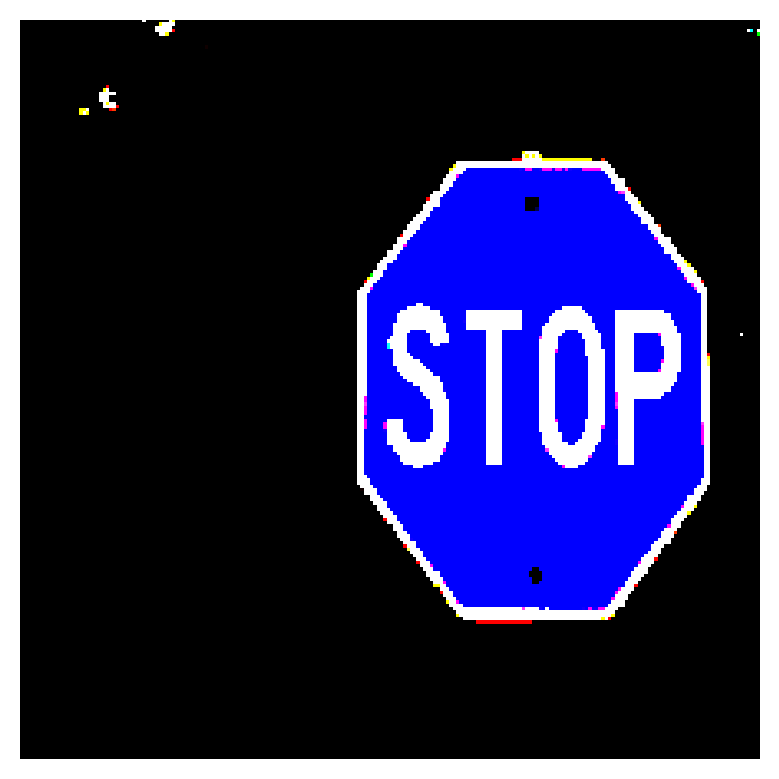

In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models

# Load preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])
plt.axis("off")

In [12]:
# Feature Extractor
feature_extractor = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_size, input_size, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(DROPOUT_FACTOR)])

# Model Adaptor
model_adaptor = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation='relu')])

# Classifier Head
classifier_head = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')])

# Full Model Definition
model = tf.keras.Sequential([
    feature_extractor,
    model_adaptor,
    classifier_head])

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 52, 52, 128)       93248     
                                                                 
 sequential_5 (Sequential)   (None, 64)                22151232  
                                                                 
 sequential_6 (Sequential)   (None, 2)                 4290      
                                                                 
Total params: 22,248,770
Trainable params: 22,248,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the model
history = model.fit(image, labels['classifier_head'], epochs=20)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 3.6423 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 1284.1118 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 291.1571 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 28.2006 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 46.1206 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 23.6016 - accuracy: 0.5833
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 4.4791 - accuracy: 0.7500
Epoch 8/20
1/1 [==============================] - 1s 1s/step - loss: 0.2130 - accuracy: 0.9167
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.0138 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 1s 1s/step - loss: 1.6311e-05 - accuracy: 1.0000
Epoch 11/20
1/1 [====================

In [14]:
# Extract training accuracy
accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 100.00%
